### This is a demo for artpop for showing a color magnitude diagram of a composite stellar population with magnitude in I band versus V-I as axes.

In [1]:
# Third-party imports 
import numpy as np
import matplotlib.pyplot as plt 
from astropy import units as u   

# Project import
import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

# setup for ages, photometric system, and etc.
imf = 'kroupa'  # initial mass function
phot_system = 'UBVRIplus'
log_ages = artpop.MISTIsochrone._log_age_grid[40:-3]

We then use the age grid to make a large composite stellar population:

In [8]:
csp = None
for feh in [-1, 0.0]:  # sampling with various metallicity
    print(f'[Fe/H] = {feh}')
    for age in log_ages:
        ssp = artpop.MISTSSP(
            log_age = age,       # log of age in years
            feh = feh,           # metallicity [Fe/H]
            phot_system = phot_system, # photometric system(s)
            num_stars = 1e4,      # number of stars
            random_state = rng,   # random state for reproducibility
        )
        if csp == None:
            csp = ssp
        csp = csp + ssp
    


[Fe/H] = -1


: 

: 

In [ ]:
I = csp.star_mags('Bessell_I')
V = csp.star_mags('Bessell_V')
H = csp.star_mags('2MASS_H')
J = csp.star_mags('2MASS_J')

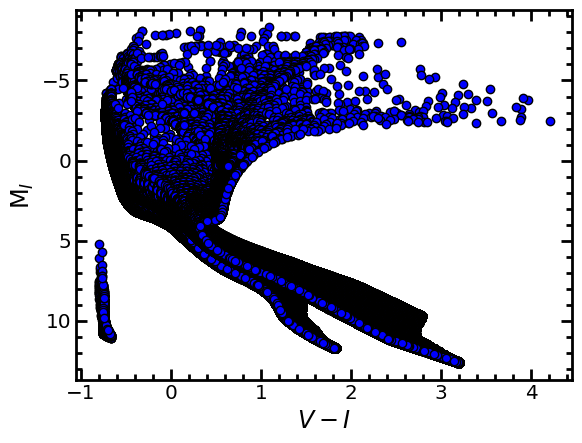

In [ ]:
# plot V-I - I

plt.plot(V - I, I, 'o', 
         c='b', mec='k')

plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$V-I$')
plt.ylabel(r'M$_I$');

In [2]:
print(log_ages)

[ 7.    7.05  7.1   7.15  7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.55
  7.6   7.65  7.7   7.75  7.8   7.85  7.9   7.95  8.    8.05  8.1   8.15
  8.2   8.25  8.3   8.35  8.4   8.45  8.5   8.55  8.6   8.65  8.7   8.75
  8.8   8.85  8.9   8.95  9.    9.05  9.1   9.15  9.2   9.25  9.3   9.35
  9.4   9.45  9.5   9.55  9.6   9.65  9.7   9.75  9.8   9.85  9.9   9.95
 10.   10.05 10.1  10.15]
